## Load Data
At the beginning of February 2023, Kevin Durant requested a trade from the Brooklyn Nets to the Pheonix Suns, just one year after signing a 5 Year Maximum Value Contract. This, of course, was a childish move from Durant and left a bad taste in the mouths of Nets fans. To help ensure Durant and the Suns never win anything significant again, our project aims to look at statistics of the five suns players on the court and provide what we believe to be the defensive scheme most likely to prevent the Suns from scoring. To do this, we randomly selected 120 possessions over 18 games, about 5% of the Suns total possesions. We used the overall distribution of possession results of the suns to set the distribution of our randomly selected sample. See below: <br>
- 2377 total possessions * .05  ~ 120 possessions
Play distribution: <br>
Possible Outcomes: Made FG, Missed FG, TOV, FTs <br>
- PHX % Score = 46.2
- PHX % TOV = 13.0
- PHX % FT = 13.0
- PHX % Miss = 100 - 46.2 - 13.0 - 13.0 = 27.8
Plays used: <br>
- Made FG: 120 * .462 = 55 Plays
- Miss FG: 120 * .278 = 33 Plays
- TOV: 120 * .13 = 16 Plays
- FTs: 120 * .13 = 16 Plays<br>

To  classify each unique five player lineup, we used the 'Four Factors of Basketball Sucess', coined Dean Oliver in 2004, who is known as a founding father of basketball analytics. 

In [156]:
import pandas as pd
players = pd.read_csv('Data/DS3000Final_Players.csv')
defenses = pd.read_csv('Data/DS3000Final_Defense.csv')
lineups = pd.read_csv('Data/DS3000Final_Lineups.csv')
play_types = pd.read_csv('Data/DS3000Final_Types.csv')
plays = pd.read_csv('Data/DS3000Final_Plays.csv')

## Explore Tables
To explore the tables, we'll make sure nothing was changed in the conversion process and ensure correct data types and table sizes

In [157]:
print(players.head())
players.info()

    Player   eFG  TOV_PCT  ORB_PCT  FT_RATE   MIN
0     Beal  44.6     12.2      3.3     23.9  28.5
1     Metu  56.8      9.7      3.2     13.6   7.1
2   Booker  52.6      8.6      3.1     39.6  34.2
3  Eubanks  59.3     13.5      7.9     29.0  17.9
4   Gordon  59.3      9.0      1.3      5.1  31.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   15 non-null     object 
 1   eFG      15 non-null     float64
 2   TOV_PCT  15 non-null     float64
 3   ORB_PCT  15 non-null     float64
 4   FT_RATE  15 non-null     float64
 5   MIN      15 non-null     float64
dtypes: float64(5), object(1)
memory usage: 852.0+ bytes


In [158]:
print(defenses.head())
defenses.info()

   Code     Name DefenseType  Count
0     1      Man     Default     55
1     2      3-2        Zone     16
2     3      2-3        Zone     41
3     4  Box + 1        Zone      6
4     5    1-3-1        Zone      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         5 non-null      int64 
 1   Name         5 non-null      object
 2   DefenseType  5 non-null      object
 3   Count        5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [159]:
print(lineups.head())
lineups.info()

   ComboNum  Player1   Player2     Player3 Player4  Player5
0         1  Goodwin    Booker      Okogie  Little     Metu
1         2   Booker    Okogie      Durant  Little   Nurkic
2         3   Booker     Allen  Bates-Diop  Little   Durant
3         4   Booker     Allen  Bates-Diop  Okogie     Metu
4         5  Goodwin  Watanabe      Durant  Little  Eubanks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ComboNum  63 non-null     int64 
 1   Player1   63 non-null     object
 2   Player2   63 non-null     object
 3   Player3   63 non-null     object
 4   Player4   63 non-null     object
 5   Player5   63 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.1+ KB


In [160]:
print(play_types.head())
play_types.info()

   Codes PlayTypes  Counts
0      1      Make      55
1      2      Miss      33
2      3       FTs      16
3      4       TOV      16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Codes      4 non-null      int64 
 1   PlayTypes  4 non-null      object
 2   Counts     4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [161]:
print(play_types.head())
play_types.info()

   Codes PlayTypes  Counts
0      1      Make      55
1      2      Miss      33
2      3       FTs      16
3      4       TOV      16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Codes      4 non-null      int64 
 1   PlayTypes  4 non-null      object
 2   Counts     4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [162]:
print(plays.head())
plays.info()

   Defense  PlayerCombo  Result
0        4            4       4
1        4            4       4
2        2            5       4
3        2            6       4
4        3            5       4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Defense      120 non-null    int64
 1   PlayerCombo  120 non-null    int64
 2   Result       120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


## Combine Data
Now we will combine our collected data to calculate the four factors for each lineup. To do this we will take the weighted averge of each statistic across the five players, by weighing each value of a given player by the amount of time they spend in any given game

In [163]:
init = [0 for _ in range(63)]
lineups['eFG'] = lineups['ORB_PCT'] = lineups['TOV_PCT'] = lineups['FT_RATE'] = lineups['AVG_MINS'] = init

In [164]:
import numpy as np
for index in lineups.index:
    names = [lineups.at[index, f'Player{i}'] for i in range(1, 6)]
    players_df = players[players['Player'].isin(names)] 
    lineups.at[index, 'AVG_MINS'] = np.mean([players_df.at[i, 'MIN'] for i in players_df.index])
    lineups.at[index, 'FT_RATE'] = np.mean([players_df.at[i, 'MIN'] * players_df.at[i, 'FT_RATE'] for i in players_df.index]) / lineups.at[index, 'AVG_MINS']
    lineups.at[index, 'TOV_PCT'] = np.mean([players_df.at[i, 'MIN'] * players_df.at[i, 'TOV_PCT'] for i in players_df.index]) / lineups.at[index, 'AVG_MINS']
    lineups.at[index, 'ORB_PCT'] = np.mean([players_df.at[i, 'MIN'] * players_df.at[i, 'ORB_PCT'] for i in players_df.index]) / lineups.at[index, 'AVG_MINS']
    lineups.at[index, 'eFG'] = np.mean([players_df.at[i, 'MIN'] * players_df.at[i, 'eFG'] for i in players_df.index]) / lineups.at[index, 'AVG_MINS']

In [165]:
lineups.describe()

,ComboNum,eFG,ORB_PCT,TOV_PCT,FT_RATE,AVG_MINS
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,55.004540,4.271874,10.206997,25.609737,25.204683
std,18.330303,1.602889,0.868618,0.962536,4.930516,4.127628
min,1.000000,51.549342,2.397285,7.874423,14.941365,9.580000
25%,16.500000,53.872104,3.638190,9.362302,22.344917,24.062500
50%,32.000000,55.226667,4.262780,10.426493,26.197740,25.480000
75%,47.500000,56.186656,4.791839,11.035137,29.099417,27.772500
max,63.000000,58.511795,6.344038,11.788932,35.742594,32.600000


## Explore the Four Factors' Distribution
We will now begin to explore what we can learn from each lineup's four factors. We will look at the distribution of each factor across the lineups with histograms, accompanied with boxplots to better visualize outliers

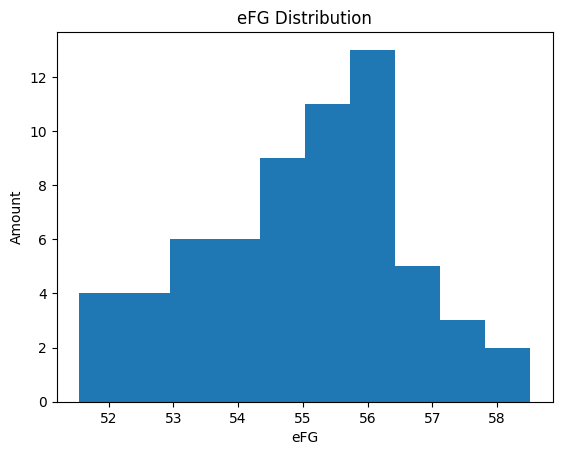

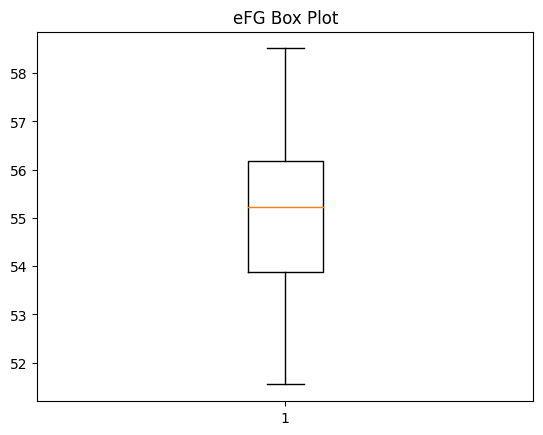

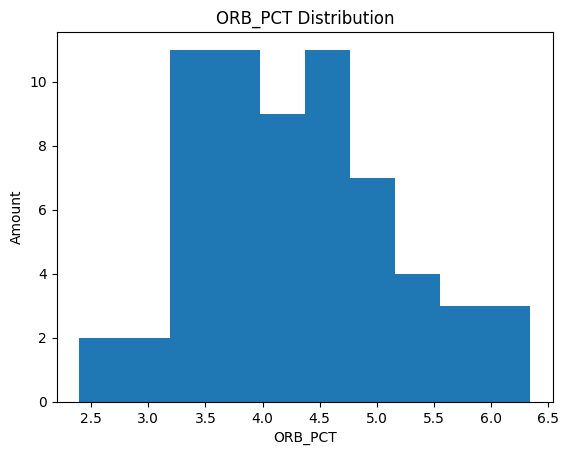

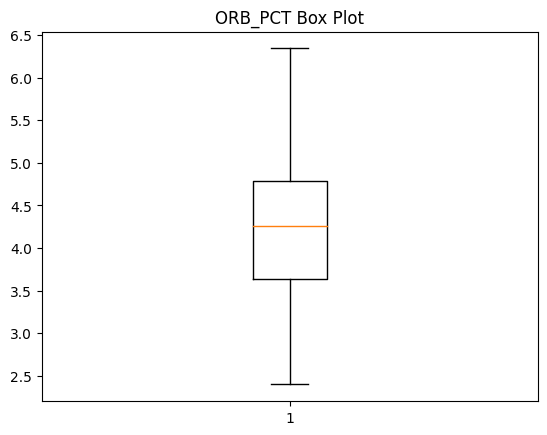

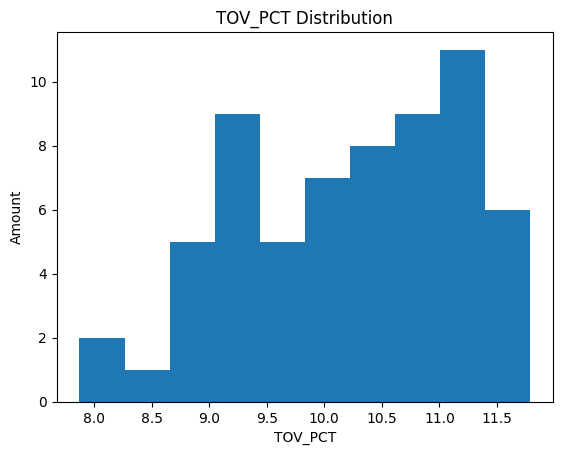

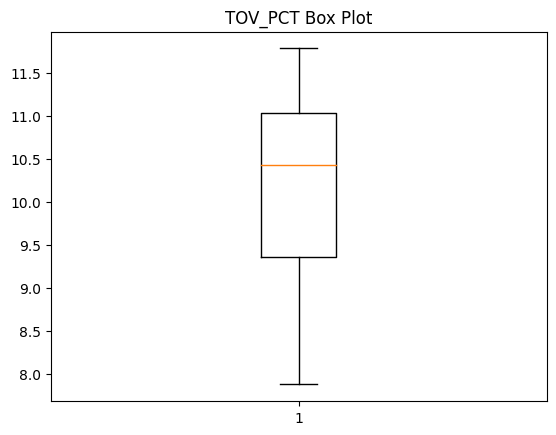

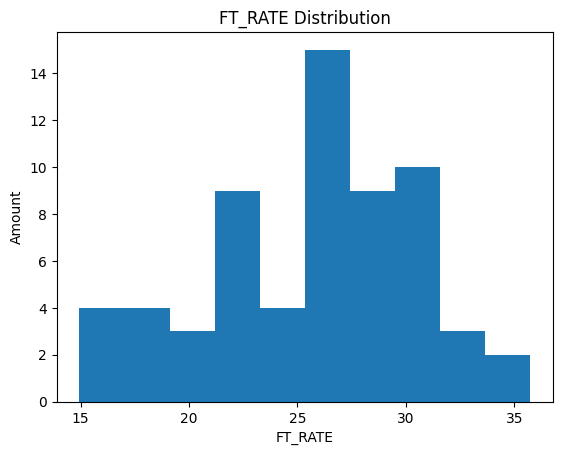

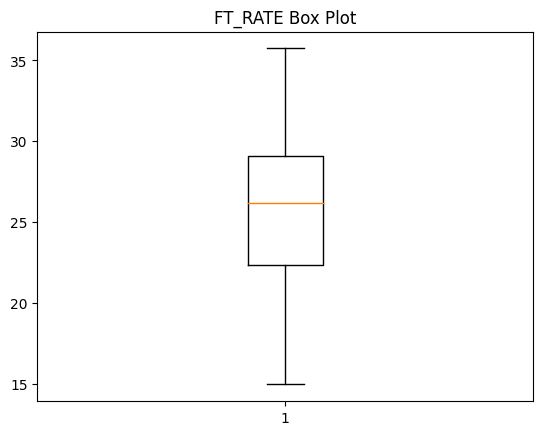

In [166]:
import matplotlib.pyplot as plt
features = ['eFG', 'ORB_PCT', 'TOV_PCT', 'FT_RATE']
for feature in features:
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Amount')
    plt.hist(lineups[feature])
    plt.show()
    plt.title(f'{feature} Box Plot')
    plt.boxplot(lineups[feature])
    plt.show()

As seen by the plots, each distribution appears fairly normal, with no apparent outliers that need to be dealt with. 

## Explore Correlation between factors
We will now explore the correlation between factors to learn more about the data and aid our eventual feature selection process

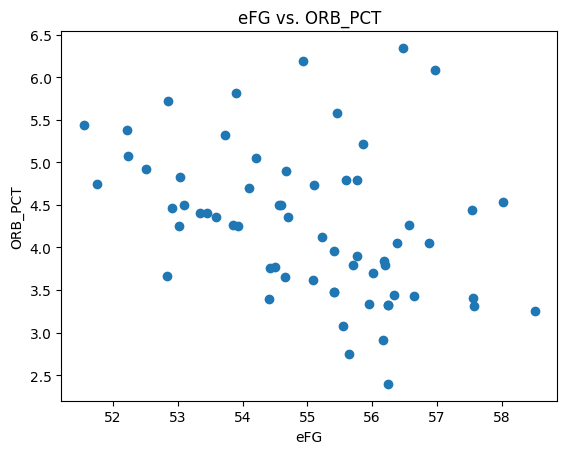

Correlation: 0.0017076990450831688


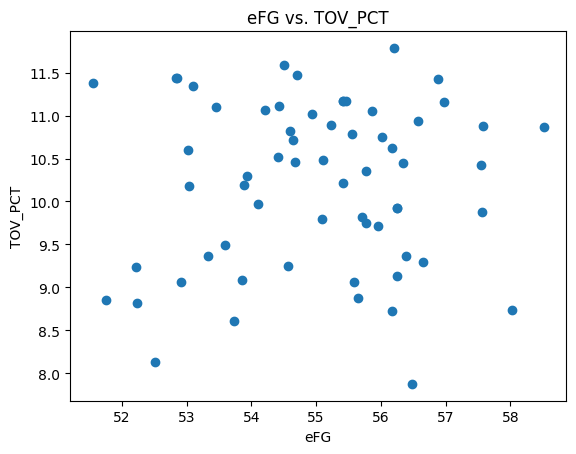

Correlation: 0.6210776274069767


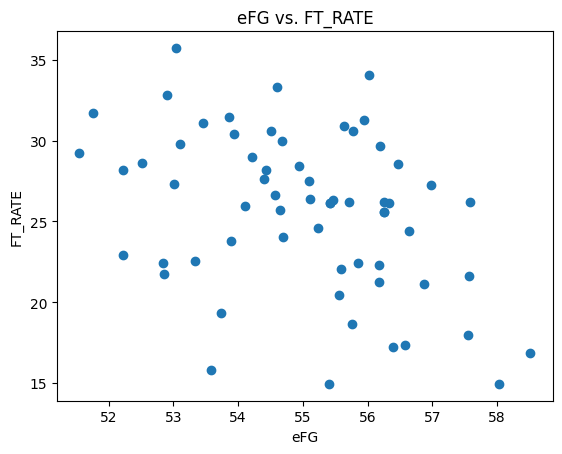

Correlation: 0.0015708115505853664


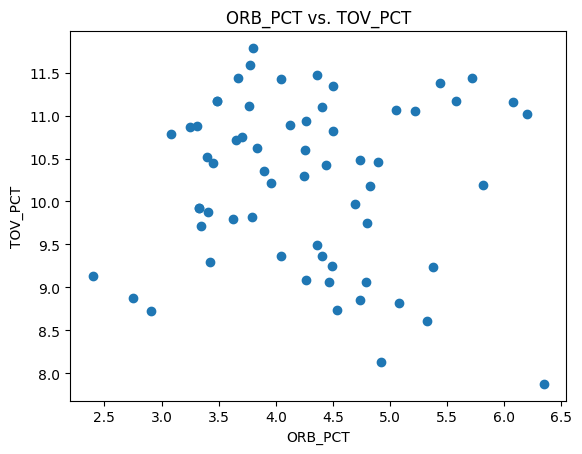

Correlation: 0.803134349378357


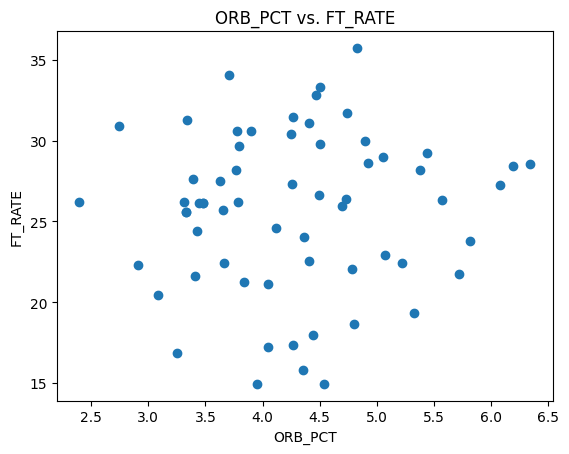

Correlation: 0.6625380767208721


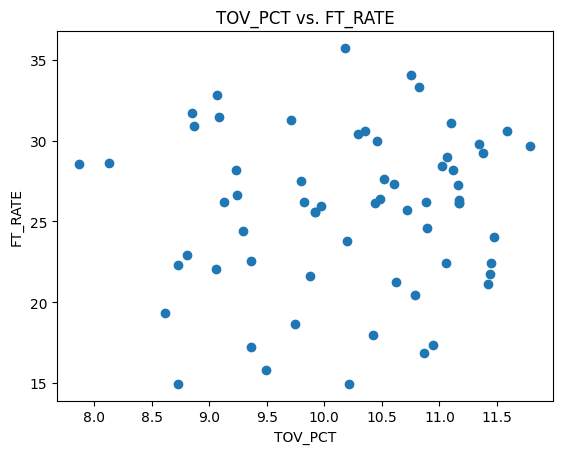

Correlation: 0.5473205270324069


In [167]:
import scipy.stats as stats
n = len(features)
for i in range(n - 1):
    for j in range(i + 1, n):
        feature1 = features[i]
        feature2 = features[j]
        plt.title(f'{feature1} vs. {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.scatter(lineups[feature1], lineups[feature2])
        plt.show()

        p, corr =  stats.pearsonr(lineups[feature1], lineups[feature2])
        print(f'Correlation: {corr}')

Both ORB% & FT Rate and eFG% & TOV% have slight correlations, while TOV% and ORB% have a slightly strong correlation
## Defense and Result Exploration
We will now look at the distribution of what defensive shemes were used against the Suns this season, as well as what happened against said schemes

In [168]:
print(plays['Defense'].value_counts())
print(plays['Result'].value_counts())

Defense
1    55
3    41
2    16
4     6
5     2
Name: count, dtype: int64
Result
1    55
2    33
4    16
3    16
Name: count, dtype: int64


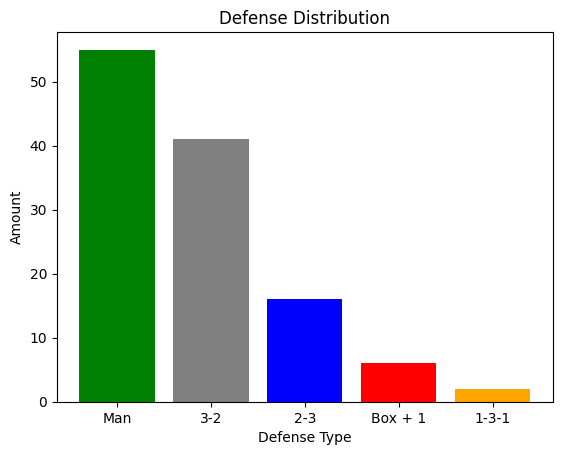

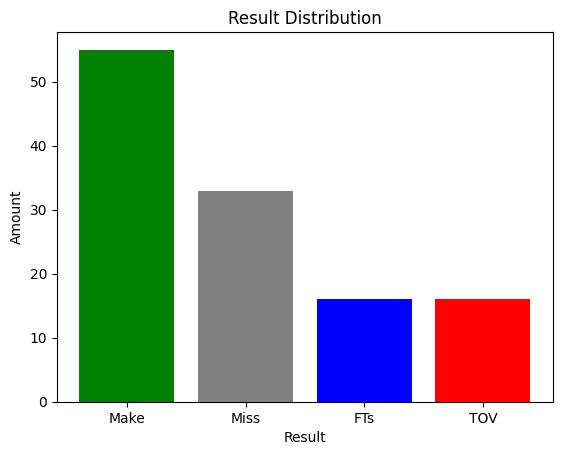

In [169]:
plt.title('Defense Distribution')
d_vc  = plays['Defense'].value_counts()
results1 = [defenses.at[index, 'Name'] for index in defenses.index]
colors1 = ['green', 'grey', 'blue', 'red', 'orange']
plt.xlabel('Defense Type')
plt.ylabel('Amount')
plt.bar(results1, [d for d in d_vc], color=colors1)
plt.show()
plt.title('Result Distribution')
r_vc  = plays['Result'].value_counts()
results2 = [play_types.at[index, 'PlayTypes'] for index in play_types.index]
colors2 = ['green', 'grey', 'blue', 'red']
plt.xlabel('Result')
plt.ylabel('Amount')
plt.bar(results2, [r for r in r_vc], color=colors2)
plt.show()

## Result per Defense
We will now look at what happened when each scheme was used against the Suns

In [170]:
def compare(x, y, result_colors):
    vc_df = plays[x].value_counts()
    for index in vc_df.index:
        if x == 'Defense':
            event = defenses[defenses['Code'] == index]['Name'].item()
        else:
            event = play_types[play_types['Codes'] == index]['PlayTypes'].item()
        plays_df = plays[plays[x] == index]
        plays_vc = plays_df[y].value_counts()
        plt.title(f'{event} Result Distribution') 
        plt.pie([vc for vc in plays_vc], labels=[result_colors[i-1][0] for i in plays_vc.index], 
                colors=[result_colors[i-1][1] for i in plays_vc.index], autopct='%1.1f%%')
        plt.show()

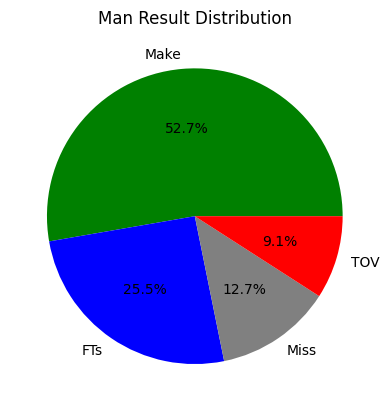

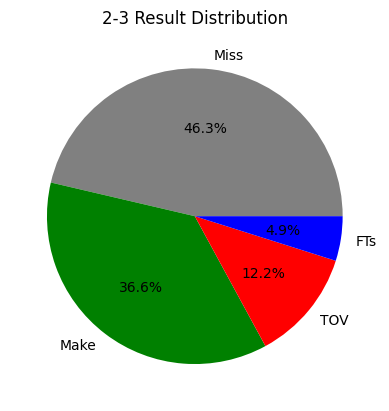

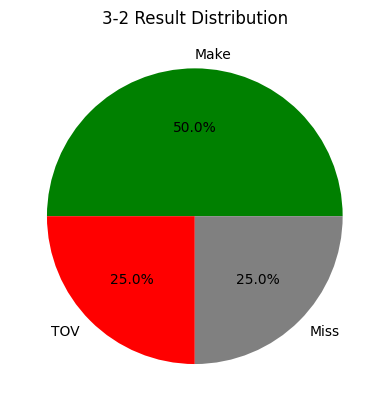

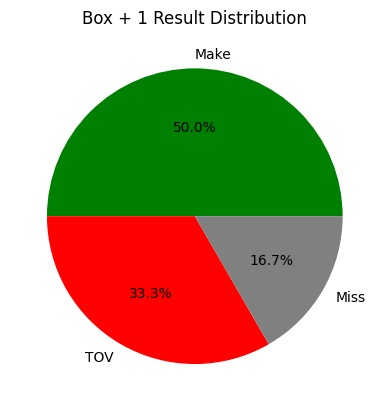

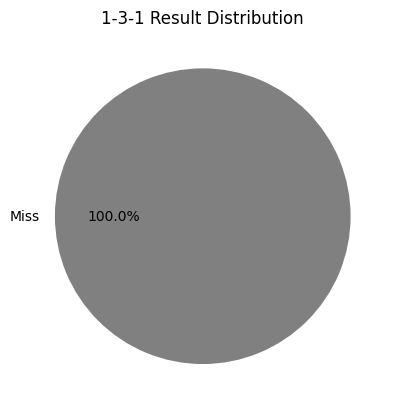

In [171]:
result_colors = [(result, colors1[i]) for i, result in enumerate(results2)]
compare('Defense', 'Result', result_colors)

Proportionally, 2-3 Zone and 1-3-1 Zone were the most sucessful schemes

## Defense per Result
We will now look at what and how many times a scheme was used for each possible play outcome

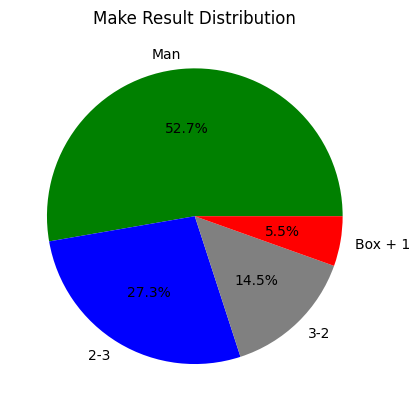

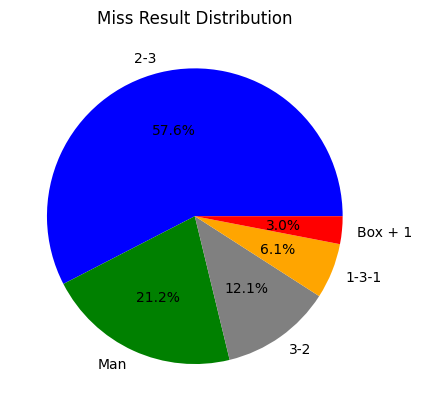

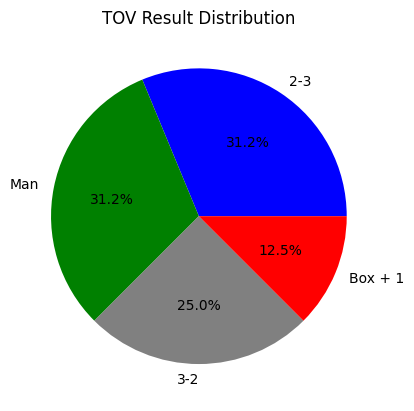

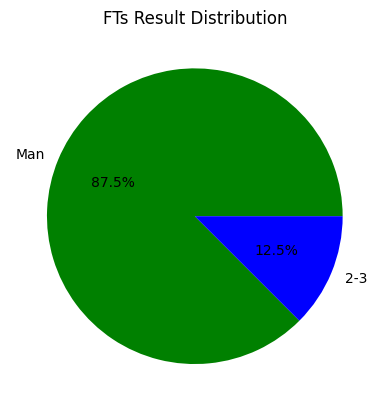

In [172]:
results = [defenses.at[index, 'Name'] for index in defenses.index]
colors = ['green', 'grey', 'blue', 'red', 'orange']
result_colors = [(result, colors[i]) for i, result in enumerate(results)]
compare('Result', 'Defense', result_colors)

As seen in the charts, using a 2-3 Zone is most likley to cause the Suns to miss, while the Man to Man and a 2-3 zone are eaually as likley to cause a turnover. 

In [173]:
# Join all data to one data frame
master_df = pd.merge(plays, lineups, left_on='PlayerCombo', right_on='ComboNum')

## Four Factor Averages per Result
We will now look at the mean of each factor when separated by play result

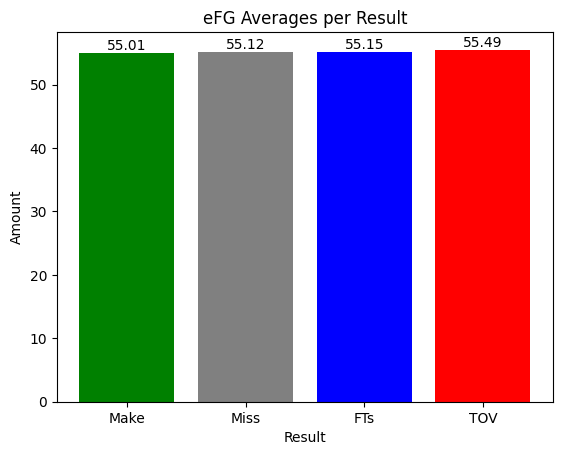

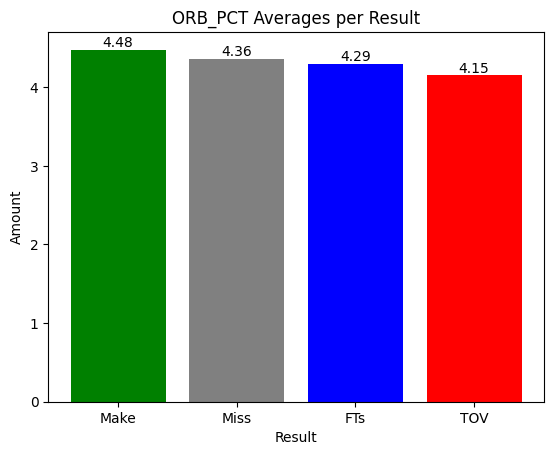

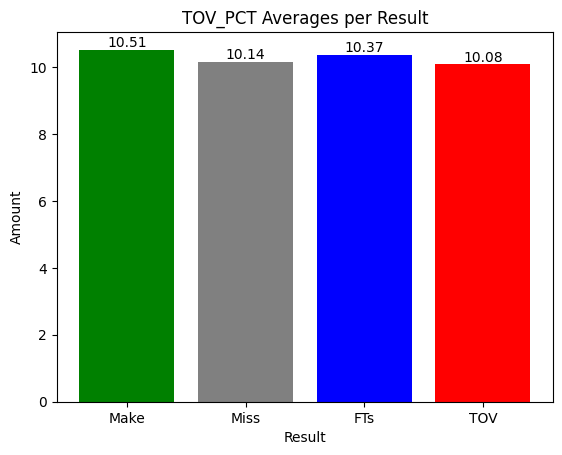

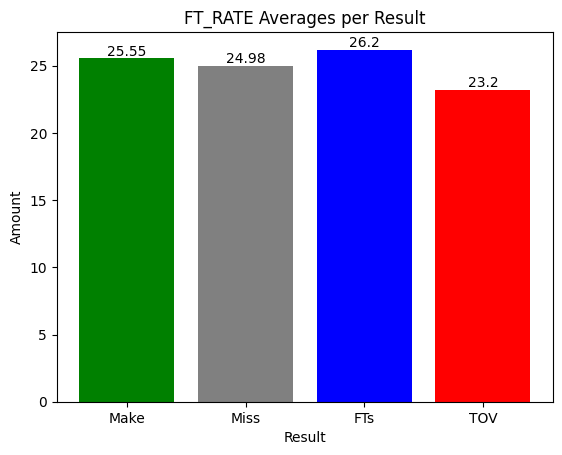

In [174]:
for f in features:
    results = []
    avgs = []
    for i in range(1, 5):
        results.append(play_types[play_types['Codes'] == i]['PlayTypes'].item())
        avgs.append(master_df[master_df['Result'] == i][f].mean())
    plt.title(f'{f} Averages per Result')
    plt.xlabel('Result')
    plt.ylabel('Amount')
    plt.bar(results, avgs, color=colors)
    for i, avg in enumerate(avgs):
        plt.text(i, avg, str(avg.round(2)), ha='center', va='bottom')
    plt.show()

As expected, all have similar statistics. However it is notable that the plays that resulted in a turnover did not have the highest average weighted TOV% <br>
## Four Factor Averages per Defense
We will now look at the mean of each factor when separated by play defensive scheme 

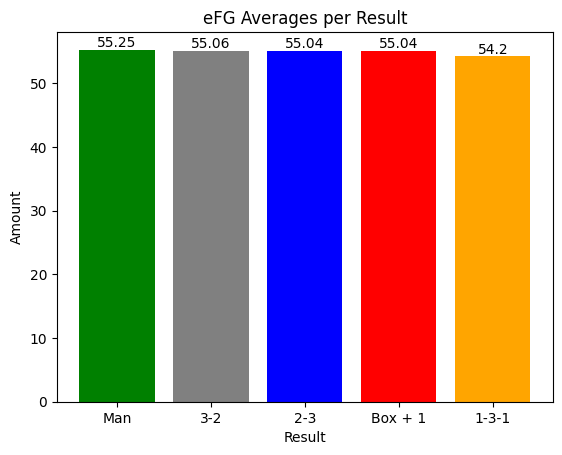

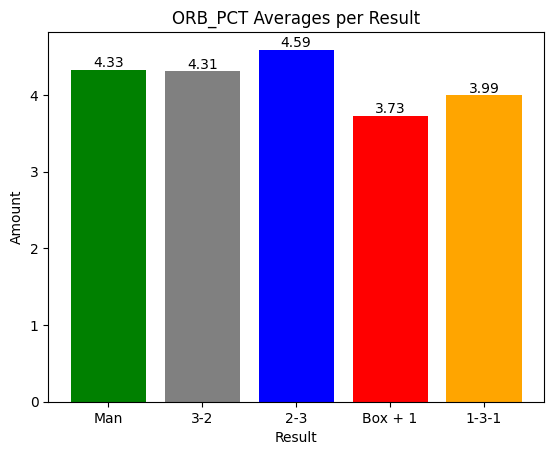

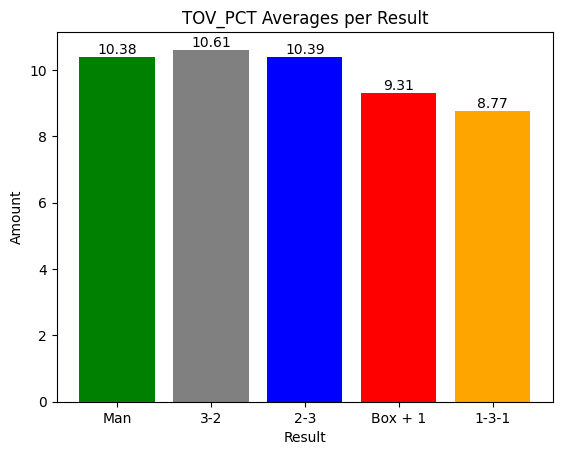

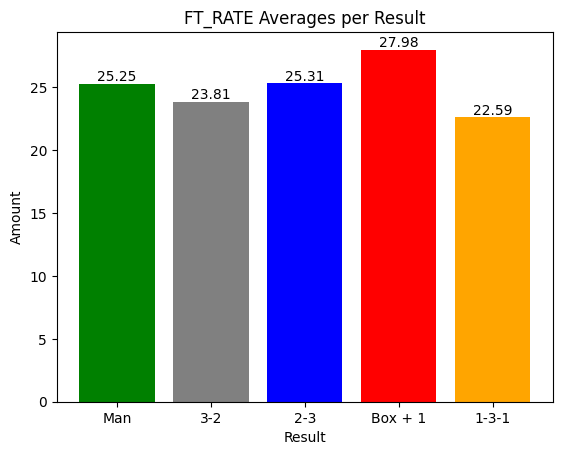

In [175]:
for f in features:
    results = []
    avgs = []
    for i in range(1, 6):
        results.append(defenses[defenses['Code'] == i]['Name'].item())
        avgs.append(master_df[master_df['Defense'] == i][f].mean())
    plt.title(f'{f} Averages per Result')
    plt.xlabel('Result')
    plt.ylabel('Amount')
    plt.bar(results, avgs, color=colors)
    for i, avg in enumerate(avgs):
        plt.text(i, avg, str(avg.round(2)), ha='center', va='bottom')
    plt.show()

While there are slight variations across schemes, these averages are more indicative of opponent coaching decisions

## Modeling
We will now use three different classification techniques to attempt to answer the question: 'Given a 5 Man lineup, what is the defensiv e scheme that is most likely to force a turnover?'

In [182]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Prepare data
features = ['eFG', 'ORB_PCT', 'TOV_PCT', 'FT_RATE', 'Defense']
x = master_df[features].copy()
y = master_df['Result']

# Encode categorical data
encoder = LabelEncoder()
x['Defense'] = x['Defense'].astype(str)
x['Defense'] = encoder.fit_transform(x['Defense'])

# split data 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, stratify=y)

# Scale numerical data 
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler.fit(x_test)
x_test = scaler.transform(x_test)

## K Nearest Neighbors

In [183]:
knn = KNeighborsClassifier()

# Tune hyperparameters 
param_grid = {'n_neighbors': [i for i in range(1, 22, 2)],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [1, 5, 10, 20]}
grid_search = GridSearchCV(knn, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

# print results
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 15, 'weights': 'uniform'}
Best score: 0.48888888888888893


## Support Vector Machine

In [184]:
from sklearn.svm import SVC
svm = SVC(random_state=3)

# Tune hyperparameters 
param_grid = {
    'C': [0.1, 1, 2, 5, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'gamma': ['scale', 'auto']  
}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# print results
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.45555555555555555


## Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=3)

# Tune hyperparameters 
param_grid = {
    'n_estimators': [25, 40, 50, 100],  
    'max_depth': [None, 20, 100, 500],  
    'min_samples_split': [2, 4, 6],  
    'min_samples_leaf': [4, 16, 24],
    'max_features': ['sqrt', 'log2', None],
    'criterion':   ['gini', 'entropy', 'log_loss']
}
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# print results
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 40}
Best score: 0.4666666666666666


As seen by the models, our K Nearest Neighbors model provides us with the most accurate prediction of play outcome based on lineup and defensive scheme. According to the score, it is almost 2x as accurate as randomly guessing the outcome (4 outcomes, 1/4 = 25%). This model, combined with experienced coaching can help provide a competetive advantage over the Phoenix Suns, ensuring they do not get passed the second round again and Kevin Durant proves he can't win a ring without Curry

Sources: <br>
- Phoenix Suns Statistics: https://apps.synergysports.com/basketball/teams/54457dd3300969b132fcfe54/overall?seasonId=651b131d1507a2202c01094c
- Four Factors: https://www.basketball-reference.com/about/factors.html
- Player Statistics: https://www.nba.com/stats/team/1610612756/players-advanced